In [1]:
import os
import json
from pprint import pprint
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datapath = "G:\\Dev\\Data"

json_file_dir = datapath + os.sep + "trees_gnps"
fragments_path = datapath + os.sep + "fragment_occurences.csv"
losses_path = datapath + os.sep + "losses_occurences.csv"

In [4]:
fragments = []
losses = []

for file in os.listdir(json_file_dir):
    filepath = os.path.join(json_file_dir, file)

    with open(filepath, 'r') as f:
        data = json.load(f)

    for fragment in data['fragments']:
        fragments.append(fragment['molecularFormula'])

    for loss in data['losses']:
        losses.append(loss['molecularFormula'])

In [5]:
fragments_counter = Counter(fragments).most_common()
losses_counter = Counter(losses).most_common()

In [6]:
with open(fragments_path, 'w') as f:
    for formula, occurences in fragments_counter:
        if int(occurences) > 3:
            f.write(str(formula) + "," + str(occurences) + "\n")

with open(losses_path, 'w') as f:
    for formula, occurences in losses_counter:
        if int(occurences) > 3:
            f.write(str(formula) + "," + str(occurences) + "\n")

In [7]:
fragments_x_axis = range(1, fragments_counter[0][1])
fragments_y_axis = []
for x in fragments_x_axis:
    fragments_y_axis.append(len([fragment for fragment in fragments_counter if fragment[1] >= x]))
    
fragments_y_axis = np.log(fragments_y_axis)

losses_x_axis = np.log(range(1, losses_counter[0][1]))
losses_y_axis = []
for x in losses_x_axis:
    losses_y_axis.append(len([loss for loss in losses_counter if loss[1] >= x]))

losses_y_axis = np.log(losses_y_axis)

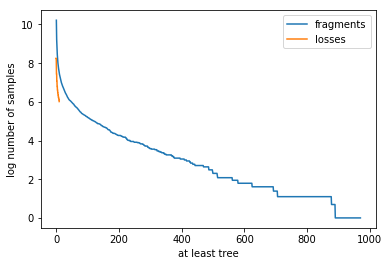

In [8]:
frag_plt = plt.plot(fragments_x_axis, fragments_y_axis, label='fragments')
loss_plt = plt.plot(losses_x_axis, losses_y_axis, label='losses')
plt.xlabel("at least tree")
plt.ylabel("log number of samples")

plt.legend()